In [1]:
import tensorflow as tf

In [2]:
print('Tensorflow version: {}'.format(tf.__version__))

Tensorflow version: 2.3.0


In [3]:
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import glob

In [13]:
all_image_path = glob.glob('../2_class/*/*.jpg')

In [14]:
all_image_path[:3]

['../2_class\\airplane\\airplane_001.jpg',
 '../2_class\\airplane\\airplane_002.jpg',
 '../2_class\\airplane\\airplane_003.jpg']

In [15]:
all_image_path[-3:]

['../2_class\\lake\\lake_698.jpg',
 '../2_class\\lake\\lake_699.jpg',
 '../2_class\\lake\\lake_700.jpg']

In [16]:
import random
random.shuffle(all_image_path)

In [17]:
all_image_path[:3]

['../2_class\\airplane\\airplane_574.jpg',
 '../2_class\\airplane\\airplane_176.jpg',
 '../2_class\\airplane\\airplane_447.jpg']

In [18]:
label_to_index = {'airplane': 0,  'lake': 1}

In [19]:
index_to_label = dict((v, k) for k, v in label_to_index.items())

In [20]:
index_to_label

{0: 'airplane', 1: 'lake'}

In [21]:
a_path = all_image_path[100]
a_path

'../2_class\\airplane\\airplane_643.jpg'

In [22]:
a_path.split('\\')[-1].split('_')[0]

'airplane'

In [23]:
all_labels = [label_to_index.get(p.split('\\')[-1].split('_')[0]) 
                                                  for p in all_image_path]

In [24]:
all_labels[:3]

[0, 0, 0]

In [25]:
all_labels[-3:]

[1, 0, 0]

In [26]:
all_image_path[:3]

['../2_class\\airplane\\airplane_574.jpg',
 '../2_class\\airplane\\airplane_176.jpg',
 '../2_class\\airplane\\airplane_447.jpg']

加载和格式化图像

In [27]:
img_path = all_image_path[0]
img_path

'../2_class\\airplane\\airplane_574.jpg'

In [28]:
img_raw = tf.io.read_file(img_path)

In [29]:
img_raw

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x01\x00\x01\x00\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc

In [30]:
img_tensor = tf.image.decode_jpeg(img_raw)

print(img_tensor.shape)
print(img_tensor.dtype)

(256, 256, 3)
<dtype: 'uint8'>


In [31]:
img_tensor = tf.cast(img_tensor, tf.float32)
img_tensor = img_tensor/255.0
print(img_tensor.shape)
print(img_tensor.numpy().min())
print(img_tensor.numpy().max())

(256, 256, 3)
0.0
1.0


In [32]:
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [256, 256])
    image = tf.cast(image, tf.float32)
    image = image/255.0  # normalize to [0,1] range
    return image

Text(0.5, 0, 'lake')

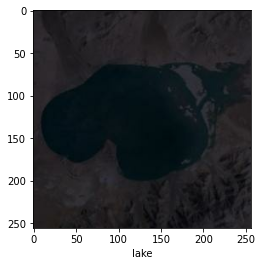

In [33]:
i = random.choice(range(len(all_image_path)))
image_path = all_image_path[i]
label = all_labels[i]

img_tensor = load_and_preprocess_image(image_path)
plt.imshow(img_tensor.numpy())
plt.xlabel(index_to_label.get(label))

In [76]:
img_ds = tf.data.Dataset.from_tensor_slices(all_image_path)

In [77]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
img_ds = img_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

In [78]:
label_ds = tf.data.Dataset.from_tensor_slices(all_labels)

In [79]:
for label in label_ds.take(10):
    print(index_to_label[label.numpy()])

airplane
airplane
airplane
airplane
lake
airplane
airplane
lake
airplane
lake


In [80]:
image_label_ds = tf.data.Dataset.zip((img_ds, label_ds))

In [81]:
image_label_ds

<ZipDataset shapes: ((256, 256, 3), ()), types: (tf.float32, tf.int32)>

In [82]:
image_count = len(all_image_path)

In [83]:
test_count = int(image_count*0.2)
train_count = image_count - test_count

In [84]:
train_ds = image_label_ds.skip(test_count)
test_ds = image_label_ds.take(test_count)

In [85]:
BATCH_SIZE = 16

In [86]:
train_ds = train_ds.repeat().shuffle(buffer_size=train_count).batch(BATCH_SIZE)
train_ds

<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [87]:
test_ds = test_ds.batch(BATCH_SIZE)

建立模型

In [46]:
model = tf.keras.Sequential()   #顺序模型
model.add(tf.keras.layers.Conv2D(64, (3, 3), input_shape=(256, 256, 3), activation='relu'))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu'))
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu'))
model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu'))
model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu'))
model.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu'))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 252, 252, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 122, 122, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 59, 59, 256)       2

In [48]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['acc']
)

In [49]:
steps_per_epoch = train_count//BATCH_SIZE
validation_steps = test_count//BATCH_SIZE

In [41]:
history = model.fit(train_ds, epochs=10, 
                    steps_per_epoch=steps_per_epoch, 
                    validation_data=test_ds, 
                    validation_steps=validation_steps)

Epoch 1/10
70/70 [==============================] - 15s 215ms/step - loss: 0.4486 - acc: 0.8009 - val_loss: 0.2757 - val_acc: 0.9154
Epoch 2/10
70/70 [==============================] - 15s 214ms/step - loss: 0.3733 - acc: 0.8955 - val_loss: 0.2925 - val_acc: 0.9301
Epoch 3/10
70/70 [==============================] - 15s 214ms/step - loss: 0.2173 - acc: 0.9455 - val_loss: 0.2967 - val_acc: 0.9485
Epoch 4/10
70/70 [==============================] - 15s 213ms/step - loss: 0.1576 - acc: 0.9652 - val_loss: 0.1557 - val_acc: 0.9449
Epoch 5/10
70/70 [==============================] - 15s 213ms/step - loss: 0.0835 - acc: 0.9777 - val_loss: 0.1230 - val_acc: 0.9669
Epoch 6/10
70/70 [==============================] - 15s 214ms/step - loss: 0.1099 - acc: 0.9732 - val_loss: 0.1432 - val_acc: 0.9485
Epoch 7/10
70/70 [==============================] - 15s 214ms/step - loss: 0.1310 - acc: 0.9643 - val_loss: 0.1528 - val_acc: 0.9596
Epoch 8/10
70/70 [==============================] - 15s 213ms/step - 

In [42]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

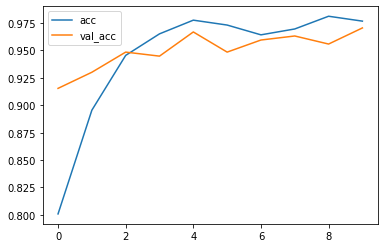

In [43]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()

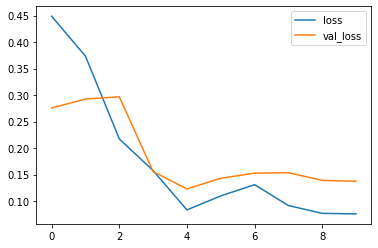

In [44]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()

使用模型预测

In [98]:
img_path = 'test02.jpg'
img = load_and_preprocess_image(img_path)

In [99]:
img.shape

TensorShape([256, 256, 3])

In [100]:
img = tf.expand_dims(img, axis=0)

In [101]:
img.shape

TensorShape([1, 256, 256, 3])

In [103]:
pred = model.predict(img)

In [105]:
index_to_label.get((pred > 0.5).astype('int')[0][0])

'airplane'

In [106]:
def pre_img(img_path):
    img = load_and_preprocess_image(img_path)
    img = tf.expand_dims(img, axis=0)
    pred = model.predict(img)
    print(index_to_label.get((pred > 0.5).astype('int')[0][0]))

In [107]:
pre_img('test01.jpg')

lake


In [108]:
pre_img('test02.jpg')

airplane
